Mathematical Explanation of LASSO Regression

1. Objective Function:
   LASSO (Least Absolute Shrinkage and Selection Operator) minimizes the residual sum of squares (RSS) 
   with an added $ \ell_1 $-norm penalty on the coefficients to encourage sparsity.

   The optimization problem is:
   $$
   \min_{\beta} \frac{1}{2n} \| y - X\beta \|_2^2 + \lambda \|\beta\|_1
   $$

   Where:
   - $ y $: Response vector ($ n \times 1 $).
   - $ X $: Design matrix ($ n \times p $).
   - $ \beta $: Coefficients vector ($ p \times 1 $).
   - $ \lambda $: Regularization parameter controlling sparsity.

2. Penalty Term:
   The penalty $ \|\beta\|_1 $ is defined as:
   $$
   \|\beta\|_1 = \sum_{j=1}^p |\beta_j|
   $$

   This encourages some coefficients ($ \beta_j $) to shrink to exactly zero, performing both shrinkage and variable selection.

3. Effect of $ \lambda $:
   - $ \lambda = 0 $: No penalty, equivalent to Ordinary Least Squares (OLS).
   - $ \lambda > 0 $: Larger penalty, leading to sparser solutions.

4. Bias-Variance Tradeoff:
   - Larger $ \lambda $: Increases bias (stronger regularization), reduces variance.
   - Smaller $ \lambda $: Reduces bias (weaker regularization), increases variance.

5. Comparison with Ridge Regression:
   - LASSO uses an $ \ell_1 $-norm penalty:
     $$
     \|\beta\|_1 = \sum_{j=1}^p |\beta_j|
     $$
   - Ridge uses an $ \ell_2 $-norm penalty:
     $$
     \|\beta\|_2^2 = \sum_{j=1}^p \beta_j^2
     $$
   - LASSO shrinks some coefficients to exactly zero, performing feature selection.
   - Ridge shrinks coefficients continuously but does not eliminate them.

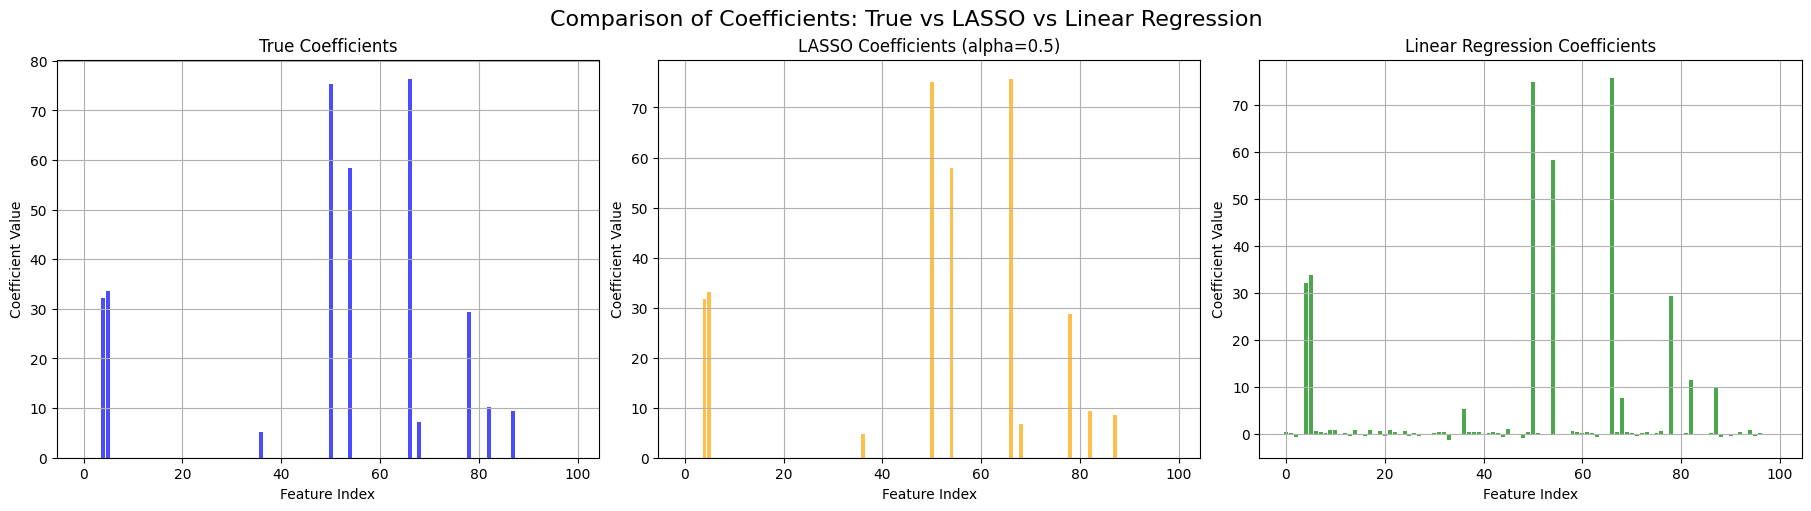

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.datasets import make_regression

# Generate synthetic regression data with many irrelevant features
np.random.seed(42)
X, y, coef = make_regression(
    n_samples=100, n_features=100, n_informative=10, noise=0.1, coef=True, random_state=42
)

# Apply LASSO with a strong regularization parameter
lasso = Lasso(alpha=0.5)  # Regularization parameter
lasso.fit(X, y)

# Linear Regression (no regularization)
linear_reg = LinearRegression()
linear_reg.fit(X, y)

# Visualization of coefficients in a 1x3 plot layout
fig, axes = plt.subplots(1, 3, figsize=(18, 5), constrained_layout=True)

# True Coefficients
axes[0].bar(range(len(coef)), coef, alpha=0.7, color="blue")
axes[0].set_title("True Coefficients")
axes[0].set_xlabel("Feature Index")
axes[0].set_ylabel("Coefficient Value")
axes[0].grid(True)

# LASSO Coefficients
axes[1].bar(range(len(lasso.coef_)), lasso.coef_, alpha=0.7, color="orange")
axes[1].set_title("LASSO Coefficients (alpha=0.5)")
axes[1].set_xlabel("Feature Index")
axes[1].set_ylabel("Coefficient Value")
axes[1].grid(True)

# Linear Regression Coefficients
axes[2].bar(range(len(linear_reg.coef_)), linear_reg.coef_, alpha=0.7, color="green")
axes[2].set_title("Linear Regression Coefficients")
axes[2].set_xlabel("Feature Index")
axes[2].set_ylabel("Coefficient Value")
axes[2].grid(True)

plt.suptitle("Comparison of Coefficients: True vs LASSO vs Linear Regression", fontsize=16)
plt.show()


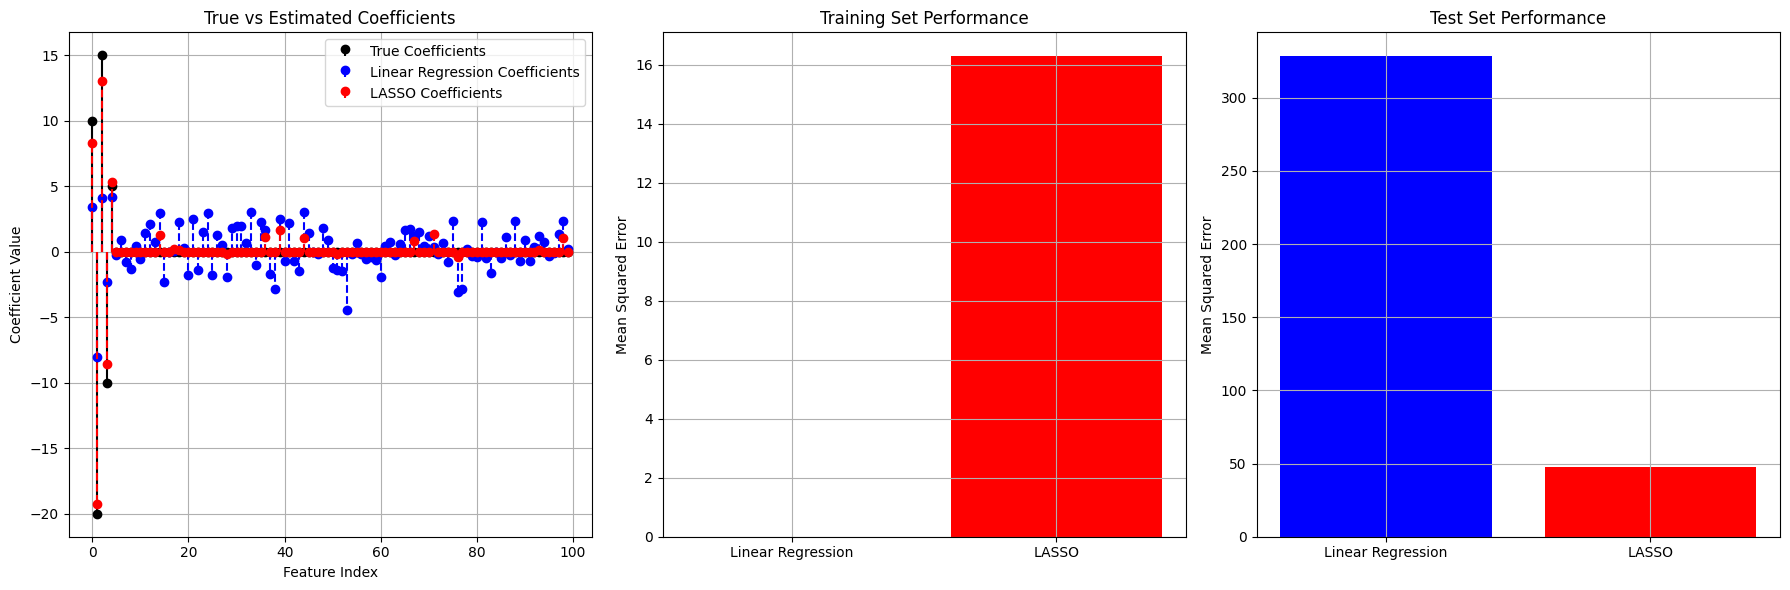

Linear Regression Training MSE: 0.00
LASSO Training MSE: 16.29
Linear Regression Test MSE: 328.27
LASSO Test MSE: 47.86


In [22]:
# Full code with all graphs in a 1x3 grid
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generate high-dimensional data
np.random.seed(42)
n_samples, n_features = 50, 100
X = np.random.randn(n_samples, n_features)

# Sparse true coefficients
true_coefficients = np.zeros(n_features)
true_coefficients[:5] = [10, -20, 15, -10, 5]  # Only first 5 features are important

# Generate target with noise
y = X @ true_coefficients + np.random.normal(scale=5.0, size=n_samples)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Linear Regression and LASSO
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

# Predictions
linear_train_predictions = linear_model.predict(X_train)
lasso_train_predictions = lasso_model.predict(X_train)

linear_test_predictions = linear_model.predict(X_test)
lasso_test_predictions = lasso_model.predict(X_test)

# Mean Squared Errors
linear_train_mse = mean_squared_error(y_train, linear_train_predictions)
lasso_train_mse = mean_squared_error(y_train, lasso_train_predictions)

linear_test_mse = mean_squared_error(y_test, linear_test_predictions)
lasso_test_mse = mean_squared_error(y_test, lasso_test_predictions)

# Plot results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Coefficient comparison
axes[0].stem(true_coefficients, label="True Coefficients", linefmt='k-', markerfmt='ko', basefmt=" ")
axes[0].stem(linear_model.coef_, label="Linear Regression Coefficients", linefmt='b--', markerfmt='bo', basefmt=" ")
axes[0].stem(lasso_model.coef_, label="LASSO Coefficients", linefmt='r--', markerfmt='ro', basefmt=" ")
axes[0].set_xlabel("Feature Index")
axes[0].set_ylabel("Coefficient Value")
axes[0].set_title("True vs Estimated Coefficients")
axes[0].legend()
axes[0].grid(True)

# Training MSE comparison
axes[1].bar(["Linear Regression", "LASSO"], [linear_train_mse, lasso_train_mse], color=["blue", "red"])
axes[1].set_ylabel("Mean Squared Error")
axes[1].set_title("Training Set Performance")
axes[1].grid(True)

# Test MSE comparison
axes[2].bar(["Linear Regression", "LASSO"], [linear_test_mse, lasso_test_mse], color=["blue", "red"])
axes[2].set_ylabel("Mean Squared Error")
axes[2].set_title("Test Set Performance")
axes[2].grid(True)

plt.tight_layout()
plt.show()

# Print MSE results
print(f"Linear Regression Training MSE: {linear_train_mse:.2f}")
print(f"LASSO Training MSE: {lasso_train_mse:.2f}")
print(f"Linear Regression Test MSE: {linear_test_mse:.2f}")
print(f"LASSO Test MSE: {lasso_test_mse:.2f}")


### Polynomial Regression

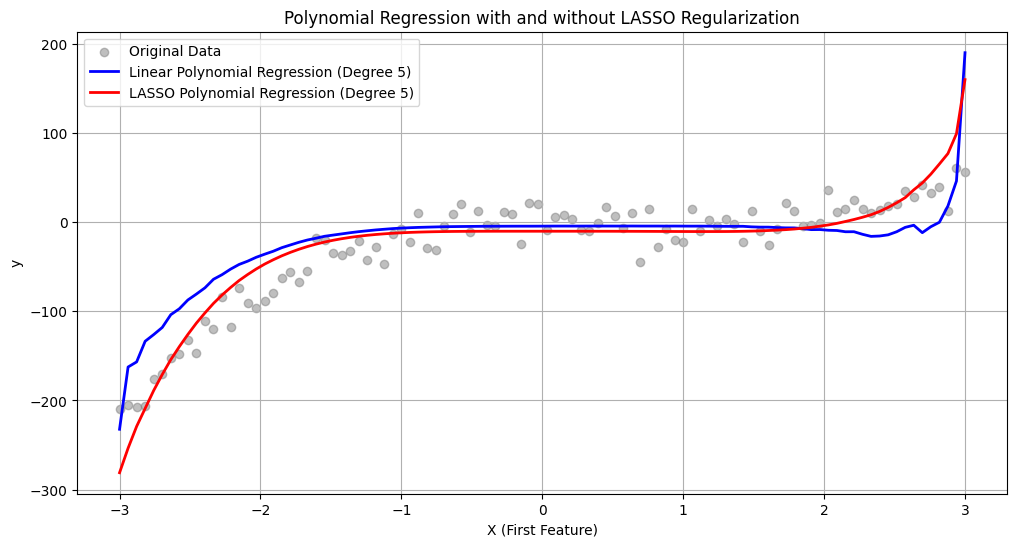

Linear Polynomial Regression Training MSE: 0.00
Linear Polynomial Regression Test MSE: 2503.07
LASSO Polynomial Regression Training MSE: 330.15
LASSO Polynomial Regression Test MSE: 476.19


In [30]:
# Modify the data to better highlight LASSO's advantages
np.random.seed(42)

# Generate nonlinear data with a higher noise level and irrelevant features
X = np.linspace(-3, 3, 100).reshape(-1, 1)  # Single feature
irrelevant_features = np.random.normal(size=(100, 10))  # 10 irrelevant features
X = np.hstack((X, irrelevant_features))  # Combine relevant and irrelevant features

# True relationship only depends on the first feature (nonlinear)
y = (5 * X[:, 0]**3 - 10 * X[:, 0]**2 + 2 * X[:, 0]).ravel() + np.random.normal(scale=15, size=X.shape[0])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Polynomial Regression (degree 5) with LASSO
lasso_poly = make_pipeline(PolynomialFeatures(degree=5), Lasso(alpha=50, max_iter=10000))
lasso_poly.fit(X_train, y_train)

# Polynomial Regression (degree 5) without regularization (Linear Regression)
linear_poly = make_pipeline(PolynomialFeatures(degree=5), LinearRegression())
linear_poly.fit(X_train, y_train)

# Predictions
lasso_train_pred = lasso_poly.predict(X_train)
lasso_test_pred = lasso_poly.predict(X_test)

linear_train_pred = linear_poly.predict(X_train)
linear_test_pred = linear_poly.predict(X_test)

# Mean Squared Errors
lasso_train_mse = mean_squared_error(y_train, lasso_train_pred)
lasso_test_mse = mean_squared_error(y_test, lasso_test_pred)

linear_train_mse = mean_squared_error(y_train, linear_train_pred)
linear_test_mse = mean_squared_error(y_test, linear_test_pred)

# Visualization
plt.figure(figsize=(12, 6))

# Original data and predictions for the first feature
plt.scatter(X[:, 0], y, label="Original Data", color="gray", alpha=0.5)
plt.plot(np.sort(X[:, 0]), linear_poly.predict(np.sort(X, axis=0)), label="Linear Polynomial Regression (Degree 5)", color="blue", linewidth=2)
plt.plot(np.sort(X[:, 0]), lasso_poly.predict(np.sort(X, axis=0)), label="LASSO Polynomial Regression (Degree 5)", color="red", linewidth=2)

# Titles and labels
plt.xlabel("X (First Feature)")
plt.ylabel("y")
plt.title("Polynomial Regression with and without LASSO Regularization")
plt.legend()
plt.grid(True)
plt.show()

# Print MSE results
print(f"Linear Polynomial Regression Training MSE: {linear_train_mse:.2f}")
print(f"Linear Polynomial Regression Test MSE: {linear_test_mse:.2f}")
print(f"LASSO Polynomial Regression Training MSE: {lasso_train_mse:.2f}")
print(f"LASSO Polynomial Regression Test MSE: {lasso_test_mse:.2f}")


### Increasing Covariates

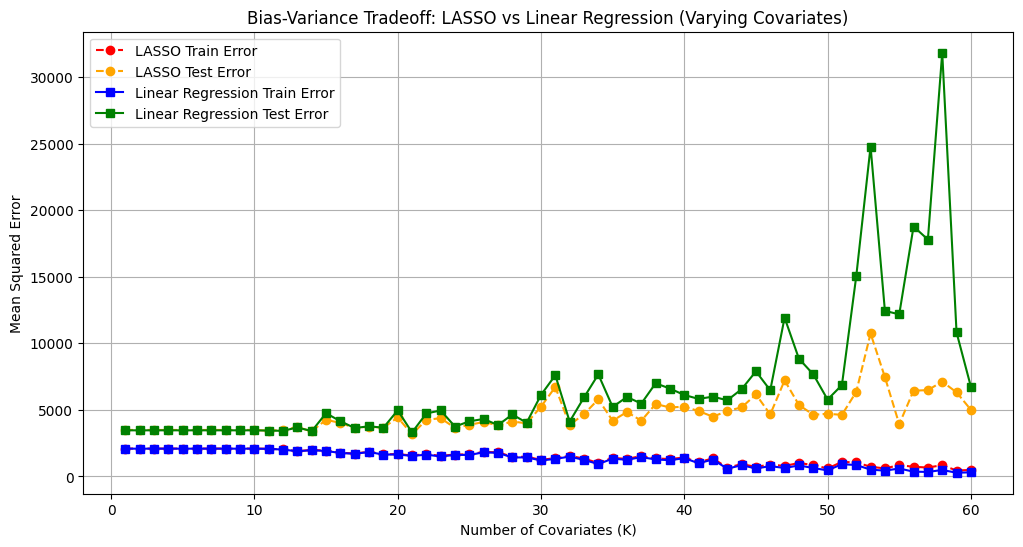

In [37]:
# Full code for comparing LASSO and Linear Regression with varying covariates

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Function to simulate data with variable number of relevant and irrelevant features
def simulate_data_with_irrelevant_features(n_samples, n_relevant, n_irrelevant, noise=0.1):
    X_relevant, y, true_coef = make_regression(
        n_samples=n_samples,
        n_features=n_relevant,
        noise=noise,
        coef=True,
        random_state=42,
    )
    X_irrelevant = np.random.normal(size=(n_samples, n_irrelevant))  # Irrelevant features
    X = np.hstack((X_relevant, X_irrelevant))
    return X, y, true_coef

# Parameters for simulation
n_samples = 100
n_relevant_features = 10
n_irrelevant_features = 50
noise = 50  # Increased noise to emphasize LASSO's advantage
alpha = 1  # Regularization parameter for LASSO

# Initialize error lists
train_errors_lasso, test_errors_lasso = [], []
train_errors_linear, test_errors_linear = [], []
feature_counts = list(range(1, n_relevant_features + n_irrelevant_features + 1))

# Simulate and evaluate models
for n_features in feature_counts:
    # Generate data
    X, y, true_coef = simulate_data_with_irrelevant_features(
        n_samples=n_samples,
        n_relevant=n_relevant_features,
        n_irrelevant=max(0, n_features - n_relevant_features),
        noise=noise,
    )
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Train LASSO
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train, y_train)
    train_errors_lasso.append(mean_squared_error(y_train, lasso.predict(X_train)))
    test_errors_lasso.append(mean_squared_error(y_test, lasso.predict(X_test)))

    # Train Linear Regression
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    train_errors_linear.append(mean_squared_error(y_train, linear_model.predict(X_train)))
    test_errors_linear.append(mean_squared_error(y_test, linear_model.predict(X_test)))

# Plotting the train/test errors
plt.figure(figsize=(12, 6))

plt.plot(
    feature_counts,
    train_errors_lasso,
    label="LASSO Train Error",
    marker="o",
    linestyle="--",
    color="red",
)
plt.plot(
    feature_counts,
    test_errors_lasso,
    label="LASSO Test Error",
    marker="o",
    linestyle="--",
    color="orange",
)
plt.plot(
    feature_counts,
    train_errors_linear,
    label="Linear Regression Train Error",
    marker="s",
    linestyle="-",
    color="blue",
)
plt.plot(
    feature_counts,
    test_errors_linear,
    label="Linear Regression Test Error",
    marker="s",
    linestyle="-",
    color="green",
)

plt.xlabel("Number of Covariates (K)")
plt.ylabel("Mean Squared Error")
plt.title("Bias-Variance Tradeoff: LASSO vs Linear Regression (Varying Covariates)")
plt.legend()
plt.grid(True)
plt.show()



### Bias-Variance Tradeoff

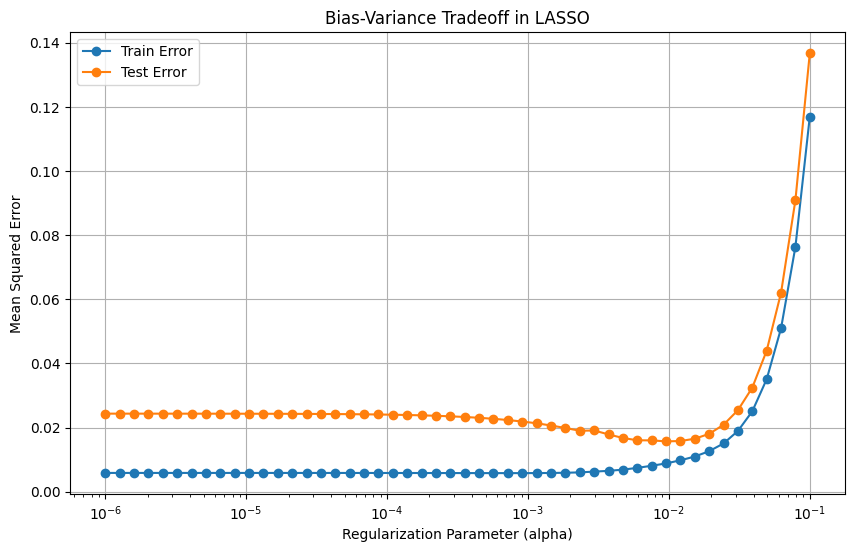

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# High-dimensional dataset
X_high_dim, y_high_dim = make_regression(n_samples=200, n_features=50, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_high_dim, y_high_dim, test_size=0.3, random_state=42)

# Regularization parameters
alphas = np.logspace(-6, -1, 50)
train_errors, test_errors = [], []

for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train, y_train)
    train_errors.append(mean_squared_error(y_train, lasso.predict(X_train)))
    test_errors.append(mean_squared_error(y_test, lasso.predict(X_test)))

# Plot train/test error curves
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_errors, label="Train Error", marker="o")
plt.plot(alphas, test_errors, label="Test Error", marker="o")
plt.xscale("log")
plt.xlabel("Regularization Parameter (alpha)")
plt.ylabel("Mean Squared Error")
plt.title("Bias-Variance Tradeoff in LASSO")
plt.legend()
plt.grid(True)
plt.show()


### Questions and Answers

1. What is the primary mathematical difference between LASSO and Ridge regression, and how does it affect the optimization landscape?  
   - LASSO uses an $ \ell_1 $-norm penalty ($ \|\beta\|_1 $), while Ridge uses an $ \ell_2 $-norm penalty ($ \|\beta\|_2^2 $).  
   - The $ \ell_1 $ penalty creates sharp corners in the constraint region, leading to sparsity, while $ \ell_2 $ results in smooth shrinkage.

2. Why does LASSO perform feature selection, while Ridge regression does not?  
   - The $ \ell_1 $ penalty introduces non-differentiability at zero, encouraging coefficients to shrink to zero. $ \ell_2 $ does not.

3. Explain why LASSO solutions can be unstable when features are highly correlated. How can this issue be mitigated?  
   - LASSO may arbitrarily select one feature from correlated predictors. Mitigation:  
     - Use Elastic Net (combines $ \ell_1 $ and $ \ell_2 $ penalties).  
     - Reduce multicollinearity (e.g., PCA).

4. What is the geometric intuition behind the LASSO constraint? How does it differ from Ridge regression?  
   - LASSO forms a diamond-shaped region in coefficient space, aligning corners with axes to encourage sparsity. Ridge forms a circle, promoting smooth shrinkage.

5. How does the regularization parameter ($ \lambda $) affect the bias-variance tradeoff in LASSO?  
   - Larger $ \lambda $ increases bias (shrinks coefficients) and reduces variance (simplifies model). Smaller $ \lambda $ reduces bias and increases variance.

6. What are the potential drawbacks of using LASSO when there are more predictors than observations ($ p > n $)?  
   - LASSO may select too many predictors or fail to identify the correct subset due to limited data and high-dimensional noise.

7. How does LASSO handle multicollinearity? Can it remove multicollinearity entirely?  
   - LASSO selects one variable from correlated groups, reducing redundancy but not eliminating multicollinearity.

8. In what scenarios would Elastic Net be preferred over pure LASSO or Ridge regression?  
   - Elastic Net is ideal when predictors are highly correlated or $ p > n $.

9. What are the implications of the LASSO penalty on model interpretability?  
   - LASSO improves interpretability by reducing predictors but may exclude weakly predictive variables and introduce bias.

10. LASSO can shrink coefficients to exactly zero. Does this mean LASSO always leads to the sparsest model?  
    - No, sparsity depends on $ \lambda $ and data. Correlated predictors or weak regularization reduce sparsity.

11. Discuss how LASSO can be extended for classification problems.  
    - LASSO can be applied to logistic regression by adding an $ \ell_1 $ penalty to the logistic loss function.

12. How do you select the optimal regularization parameter ($ \lambda $) in LASSO?  
    - Use cross-validation to minimize validation error. Avoid overfitting during cross-validation.

13. What is the role of standardization in LASSO? Why is it necessary to scale features?  
    - Standardization ensures all features are on the same scale. Without it, large-magnitude features dominate the penalty.

14. Explain why the solution path of LASSO is piecewise linear.  
    - The $ \ell_1 $ penalty creates sharp transitions in coefficient values as $ \lambda $ changes, enabling efficient computation with LARS.

15. Describe a situation where LASSO might fail to outperform OLS.  
    - LASSO may underperform when all predictors are equally important or in low-noise datasets with no multicollinearity.

16. If you were working with time-series data, would LASSO still be appropriate?  
    - Yes, but preprocessing (e.g., lag features, differencing) is required. Dependencies in time-series data may limit effectiveness.

17. Can LASSO coefficients ever take negative values?  
    - Yes, coefficients' direction depends on the data. LASSO shrinks both positive and negative values toward zero.

18. How does LASSO perform in the presence of outliers?  
    - LASSO is sensitive to outliers due to the $ \ell_2 $ loss emphasizing large deviations. Robust regression may be better.

19. Explain the computational complexity of fitting a LASSO model.  
    - Fitting LASSO involves convex optimization, scaling efficiently for high-dimensional data in modern implementations.

20. If LASSO is not converging, what steps would you take to debug?  
    - Check:  
      - Feature scaling.  
      - Adequate iterations (increase max_iter).  
      - Proper $ \lambda $ value (too small slows convergence).  
      - Data issues (e.g., multicollinearity, noise).